## Summary 

Author: Trenton Bricken

Computing circle intersections used in the Paper and fitting them using log linear regression to show how they are approximately exponential and relate to the softmax.  

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from scipy.sparse import csc_matrix, coo_matrix, csr_matrix
import pandas as pd
from scipy.integrate import quad
import time

In [2]:
from SDM_Circ_Inter_Funcs import *
from Data_Processing_Associative_Memory import *
from Implementations_Associative_Memory import softmax, d

# Computing circle intersections used in the Paper. 

## Unnormalized log as a fraction $p$ of the whole vector space

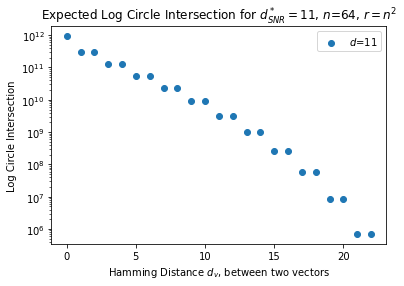

In [3]:
n=64
hamm_distances = [11]#space_frac_to_hamm_dist(n, space_frac_rang)
r = 2**n#1 #1000000 # number of neurons

# whether to enforce a neuron limit or have r = 2^n
hard_mem_places = False

for hamm_dist in hamm_distances:
    
    # circles that have centers at all distances within this given range. 
    circle_center_distances = np.arange(0,(2*hamm_dist)+1,1).astype(int)
    res = expected_intersection_interpretable(n, circle_center_distances, hamm_dist, r)
    res = np.asarray(res)
    plt.scatter(circle_center_distances, res, label="$d$="+str(hamm_dist))
    
#plt.plot(circle_center_distances, np.exp( (n//2)-1-circle_center_distances), label='exp') # need to flip so its a decay
plt.legend()
plt.yscale('log')
plt.xlabel('Hamming Distance $d_v$, between two vectors')
plt.ylabel('Log Circle Intersection')
plt.title("Expected Log Circle Intersection for $d^*_{SNR}=$"+str(hamm_dist)+", $n$="+str(n)+", $r=n^2$")
plt.gcf().savefig('figures/UnnormalizedCircleInterWeights_Log.png', dpi=250)
plt.show()

## Plots for circle intersection and the learnt $\beta$ approximation

/Users/trentonbricken/SDM/SDM_Circ_Inter_Funcs.py:273: RuntimeWarning: divide by zero encountered in log
  
/Users/trentonbricken/SDM/SDM_Circ_Inter_Funcs.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  preds = F.softmax(beta*xvals)


chop ind and its success 5 [4.50140847e-13 6.91062875e-14 6.91062875e-14 1.25266551e-14
 1.25266551e-14 1.95275653e-15] [2.05656356e-18 2.23744925e-19 4.29329088e-20 8.05399440e-21
 1.38723117e-21]
final loss 0.00016556799528189003
final loss 1.4748665080333012e-06
binary and cont betas 35.48476174346811 71.7092092212466
binary and cont softmax betas 43.738460540771484 69.15979766845703


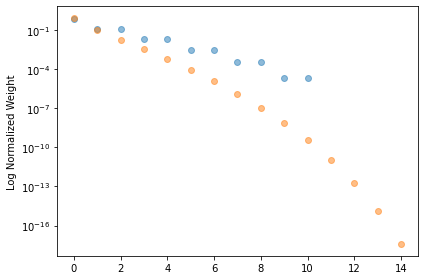

chop ind and its success 9 [1.77111169e-09 4.88083654e-10 4.88083654e-10 1.68804788e-10
 1.68804788e-10 5.78422971e-11 5.78422971e-11 1.84984955e-11
 1.84984955e-11 5.29761467e-12] [2.88445890e-11 8.38339633e-12 3.75891979e-12 1.74815309e-12
 8.12549005e-13 3.71608558e-13 1.65640070e-13 7.14425481e-14
 2.96277821e-14]
final loss 0.00018407174502499402
final loss 2.5343855668324977e-05
binary and cont betas 20.040984673242452 29.767091221988977
binary and cont softmax betas 24.593372344970703 34.28351974487305


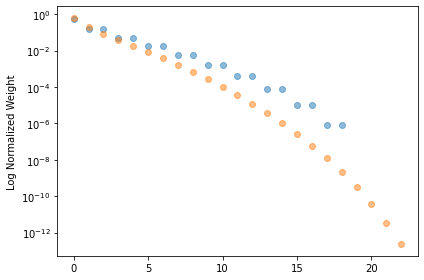

chop ind and its success 11 [5.02928992e-08 1.69108425e-08 1.69108425e-08 7.13381413e-09
 7.13381413e-09 3.04669570e-09 3.04669570e-09 1.25514759e-09
 1.25514759e-09 4.85096209e-10 4.85096209e-10 1.71475283e-10] [5.44102915e-09 2.02392197e-09 1.09805674e-09 6.19845157e-10
 3.52798426e-10 1.99904589e-10 1.11949356e-10 6.16478430e-11
 3.32450376e-11 1.74922487e-11 8.94798145e-12]
final loss 0.00015384750440716743
final loss 3.7787282053614035e-05
binary and cont betas 15.852765236405924 21.539745513133738
binary and cont softmax betas 18.813779830932617 25.14600372314453


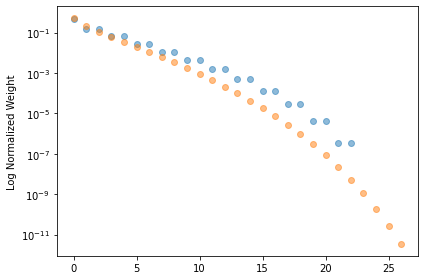

chop ind and its success 15 [1.21822861e-05 5.56151150e-06 5.56151150e-06 3.12067294e-06
 3.12067294e-06 1.80422067e-06 1.80422067e-06 1.03738017e-06
 1.03738017e-06 5.83329879e-07 5.83329879e-07 3.16953705e-07
 3.16953705e-07 1.64563852e-07 1.64563852e-07 8.06597922e-08] [9.76688180e-06 5.01531423e-06 3.42825545e-06 2.43074696e-06
 1.74661380e-06 1.26027123e-06 9.08656152e-07 6.52562197e-07
 4.65711976e-07 3.29659446e-07 2.31072887e-07 1.60140864e-07
 1.09566634e-07 7.38969882e-08 4.90540772e-08]
final loss 8.140089630614966e-05
final loss 3.8340418541338295e-05
binary and cont betas 10.110419065799583 12.229811837464288
binary and cont softmax betas 11.164142608642578 13.76323413848877


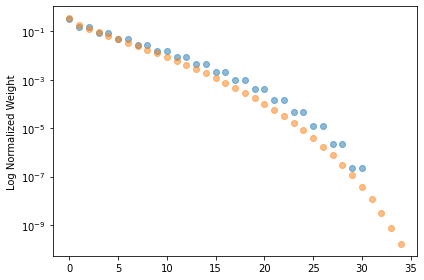

chop ind and its success 19 [7.81394672e-04 4.49023589e-04 4.49023589e-04 3.06749024e-04
 3.06749024e-04 2.16486308e-04 2.16486308e-04 1.53708616e-04
 1.53708616e-04 1.08552732e-04 1.08552732e-04 7.57120890e-05
 7.57120890e-05 5.18561502e-05 5.18561502e-05 3.46905661e-05
 3.46905661e-05 2.25389089e-05 2.25389089e-05 1.41305467e-05] [1.45127912e-03 9.18858750e-04 7.19987566e-04 5.81305179e-04
 4.75372452e-04 3.91116785e-04 3.22620690e-04 2.66219663e-04
 2.19424923e-04 1.80435830e-04 1.47888721e-04 1.20715050e-04
 9.80555204e-05 7.92052060e-05 6.35768961e-05 5.06757071e-05
 4.00809355e-05 3.14327259e-05 2.44220304e-05]
final loss 3.157548053422943e-05
final loss 2.060477163468022e-05
binary and cont betas 6.303327396264559 7.147748879820956
binary and cont softmax betas 6.596863269805908 7.584556579589844


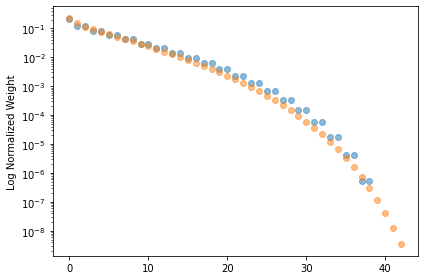

chop ind and its success 20 [1.84498214e-03 1.11376576e-03 1.11376576e-03 7.91775950e-04
 7.91775950e-04 5.81162947e-04 5.81162947e-04 4.29757924e-04
 4.29757924e-04 3.16868214e-04 3.16868214e-04 2.31482542e-04
 2.31482542e-04 1.66730708e-04 1.66730708e-04 1.17874815e-04
 1.17874815e-04 8.14198434e-05 8.14198434e-05 5.46659636e-05
 5.46659636e-05] [3.85161019e-03 2.54354734e-03 2.04538674e-03 1.69170195e-03
 1.41648361e-03 1.19332939e-03 1.00824675e-03 8.52635610e-04
 7.20691743e-04 6.08235208e-04 5.12108875e-04 4.29839904e-04
 3.59435637e-04 2.99253742e-04 2.47915972e-04 2.04248836e-04
 1.67241568e-04 1.36015607e-04 1.09801948e-04 8.79240067e-05]
final loss 2.3753609639243223e-05
final loss 1.6344309187843464e-05
binary and cont betas 5.602439820485371 6.229582244660391
binary and cont softmax betas 5.772923946380615 6.535302639007568


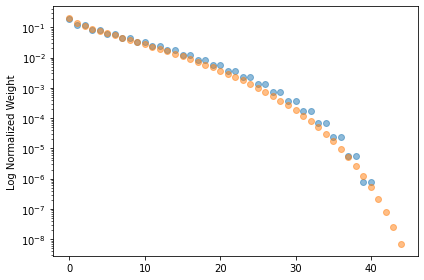

chop ind and its success 27 [0.13021774 0.10368395 0.10368395 0.09047819 0.09047819 0.080628
 0.080628   0.07247227 0.07247227 0.06538967 0.06538967 0.05907113
 0.05907113 0.05333798 0.05333798 0.04807697 0.04807697 0.04321188
 0.04321188 0.03868933 0.03868933 0.03447103 0.03447103 0.03052919
 0.03052919 0.02684373 0.02684373 0.02340044] [0.39511415 0.32689353 0.29878163 0.27731634 0.25931384 0.24354023
 0.22936264 0.21640538 0.20442392 0.1932488  0.18275696 0.17285589
 0.16347408 0.15455503 0.14605329 0.1379318  0.13015991 0.12271211
 0.11556691 0.10870618 0.10211449 0.09577869 0.08968756 0.08383151
 0.07820234 0.07279309 0.06759785]
final loss 4.06359504268039e-06
final loss 3.350344741193112e-06
binary and cont betas 1.8487152369044935 2.044003227913439
binary and cont softmax betas 2.0547215938568115 2.230811834335327


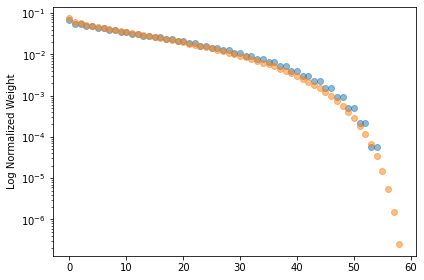

chop ind and its success 16 [1.30296791e-12 4.11142569e-13 4.11142569e-13 1.66998258e-13
 1.66998258e-13 7.02529283e-14 7.02529283e-14 2.93013779e-14
 2.93013779e-14 1.18792597e-14 1.18792597e-14 4.61940558e-15
 4.61940558e-15 1.70322823e-15 1.70322823e-15 5.88517299e-16
 5.88517299e-16] [9.77042165e-15 3.38142522e-15 1.75432042e-15 9.55059938e-16
 5.28232599e-16 2.93134224e-16 1.62141767e-16 8.90240957e-17
 4.83744267e-17 2.59540898e-17 1.37220074e-17 7.13638103e-18
 3.64467638e-18 1.82494939e-18 8.94423295e-19 4.28360940e-19]
final loss 0.0001089450015570037
final loss 2.520102498237975e-05
binary and cont betas 25.006598124656538 34.10394107759892
binary and cont softmax betas 31.43773651123047 42.78319549560547


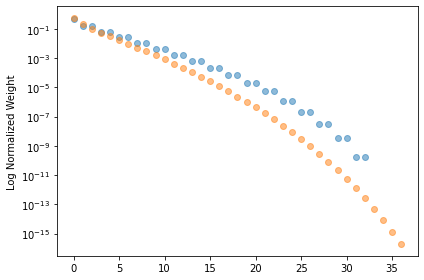

chop ind and its success 21 [2.16868332e-09 8.96207514e-10 8.96207514e-10 4.66540360e-10
 4.66540360e-10 2.53367868e-10 2.53367868e-10 1.38466382e-10
 1.38466382e-10 7.50127217e-11 7.50127217e-11 3.99249394e-11
 3.99249394e-11 2.07383617e-11 2.07383617e-11 1.04515954e-11
 1.04515954e-11 5.08129830e-12 5.08129830e-12 2.36870822e-12
 2.36870822e-12 1.05159503e-12] [3.82279930e-10 1.78357338e-10 1.14738343e-10 7.70598218e-11
 5.26680112e-11 3.62738248e-11 2.50470079e-11 1.72856048e-11
 1.18975595e-11 8.15437840e-12 5.55825971e-12 3.76395002e-12
 2.52989597e-12 1.68634504e-12 1.11385097e-12 7.28463209e-13
 4.71362524e-13 3.01532956e-13 1.90548756e-13 1.18855232e-13
 7.31150954e-14]
final loss 6.993710849201307e-05
final loss 3.0286082619568333e-05
binary and cont betas 17.19506468380946 21.312895736144345
binary and cont softmax betas 20.29889678955078 25.807966232299805


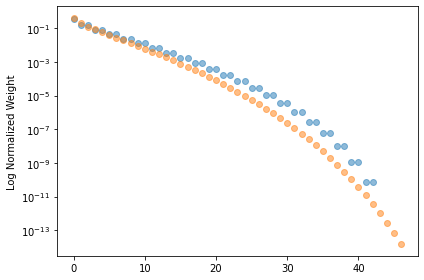

chop ind and its success 23 [2.75679039e-08 1.24641694e-08 1.24641694e-08 7.02171874e-09
 7.02171874e-09 4.12866348e-09 4.12866348e-09 2.45049705e-09
 2.45049705e-09 1.44822607e-09 1.44822607e-09 8.45541810e-10
 8.45541810e-10 4.84947013e-10 4.84947013e-10 2.71925228e-10
 2.71925228e-10 1.48408394e-10 1.48408394e-10 7.84772252e-11
 7.84772252e-11 4.00107658e-11 4.00107658e-11 1.95602431e-11] [1.03766313e-08 5.29357696e-09 3.61885453e-09 2.57609243e-09
 1.86554812e-09 1.36211775e-09 9.98108263e-10 7.31943170e-10
 5.36154878e-10 3.91753042e-10 2.85214121e-10 2.06716840e-10
 1.49035486e-10 1.06809529e-10 7.60425431e-11 5.37481102e-11
 3.76938772e-11 2.62133976e-11 1.80660624e-11 1.23318997e-11
 8.33209919e-12 5.56876845e-12 3.67921186e-12]
final loss 5.5111595429480076e-05
final loss 2.8126270990469493e-05
binary and cont betas 14.865579841765054 17.843981494890887
binary and cont softmax betas 17.043025970458984 21.087350845336914


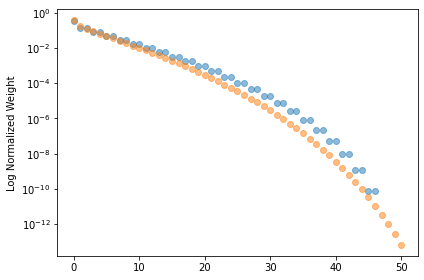

chop ind and its success 29 [1.60800076e-05 9.12880047e-06 9.12880047e-06 6.21992590e-06
 6.21992590e-06 4.40937639e-06 4.40937639e-06 3.16855186e-06
 3.16855186e-06 2.28434112e-06 2.28434112e-06 1.64304542e-06
 1.64304542e-06 1.17468339e-06 1.17468339e-06 8.32430518e-07
 8.32430518e-07 5.83290564e-07 5.83290564e-07 4.03238199e-07
 4.03238199e-07 2.74422959e-07 2.74422959e-07 1.83430162e-07
 1.83430162e-07 1.20130150e-07 1.20130150e-07 7.68773342e-08
 7.68773342e-08 4.79292660e-08] [2.27023654e-05 1.42663715e-05 1.11551731e-05 9.00757303e-06
 7.38175929e-06 6.09852069e-06 5.06182604e-06 4.21222027e-06
 3.50945784e-06 2.92460598e-06 2.43595456e-06 2.02669093e-06
 1.68348157e-06 1.39555769e-06 1.15409835e-06 9.51798719e-07
 7.82557943e-07 6.41247460e-07 5.23534833e-07 4.25747038e-07
 3.44762424e-07 2.77923948e-07 2.22968514e-07 1.77968695e-07
 1.41284155e-07 1.11520752e-07 8.74958449e-08 6.82086459e-08
 5.28147439e-08]
final loss 2.2206217181519605e-05
final loss 1.571494431118481e-05
bi

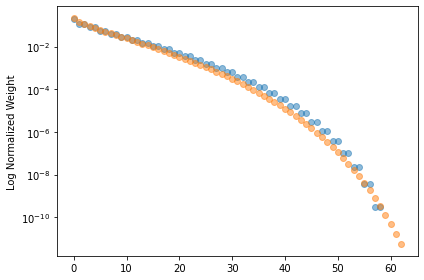

chop ind and its success 33 [4.36859918e-04 2.81104124e-04 2.81104124e-04 2.11172951e-04
 2.11172951e-04 1.64311856e-04 1.64311856e-04 1.29607708e-04
 1.29607708e-04 1.02776485e-04 1.02776485e-04 8.15709739e-05
 8.15709739e-05 6.46145070e-05 6.46145070e-05 5.09778479e-05
 5.09778479e-05 3.99911698e-05 3.99911698e-05 3.11485925e-05
 3.11485925e-05 2.40548805e-05 2.40548805e-05 1.83934741e-05
 1.83934741e-05 1.39062065e-05 1.39062065e-05 1.03798299e-05
 1.03798299e-05 7.63670921e-06 7.63670921e-06 5.52816742e-06
 5.52816742e-06 3.92957187e-06] [9.30875402e-04 6.50551797e-04 5.42133438e-04 4.63978031e-04
 4.02142302e-04 3.51083308e-04 3.07883266e-04 2.70762378e-04
 2.38529470e-04 2.10334481e-04 1.85541528e-04 1.63657525e-04
 1.44289145e-04 1.27115429e-04 1.11869571e-04 9.83263594e-05
 8.62932513e-05 7.56038643e-05 6.61131232e-05 5.76935685e-05
 5.02325013e-05 4.36297389e-05 3.77958267e-05 3.26505955e-05
 2.81219823e-05 2.41450581e-05 2.06612150e-05 1.76174835e-05
 1.49659499e-05 1.2663257

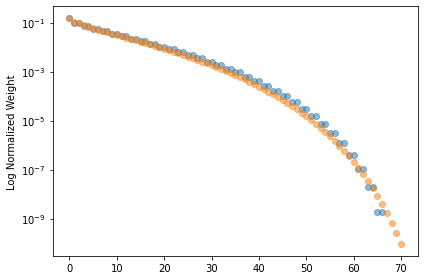

chop ind and its success 35 [1.75882086e-03 1.19731468e-03 1.19731468e-03 9.38033325e-04
 9.38033325e-04 7.59109143e-04 7.59109143e-04 6.22461559e-04
 6.22461559e-04 5.13347921e-04 5.13347921e-04 4.24138528e-04
 4.24138528e-04 3.50215015e-04 3.50215015e-04 2.88489291e-04
 2.88489291e-04 2.36748610e-04 2.36748610e-04 1.93324754e-04
 1.93324754e-04 1.56910365e-04 1.56910365e-04 1.26449537e-04
 1.26449537e-04 1.01068985e-04 1.01068985e-04 8.00328506e-05
 8.00328506e-05 6.27120025e-05 6.27120025e-05 4.85625774e-05
 4.85625774e-05 3.71106502e-05 3.71106502e-05 2.79410650e-05] [4.25603276e-03 3.11541464e-03 2.66620926e-03 2.33700830e-03
 2.07214669e-03 1.84967006e-03 1.65811291e-03 1.49053629e-03
 1.34233145e-03 1.21023312e-03 1.09181489e-03 9.85206245e-04
 8.88922500e-04 8.01756872e-04 7.22708940e-04 6.50935493e-04
 5.85715718e-04 5.26425923e-04 4.72520755e-04 4.23518997e-04
 3.78992628e-04 3.38558284e-04 3.01870503e-04 2.68616312e-04
 2.38510850e-04 2.11293794e-04 1.86726416e-04 1.64589135

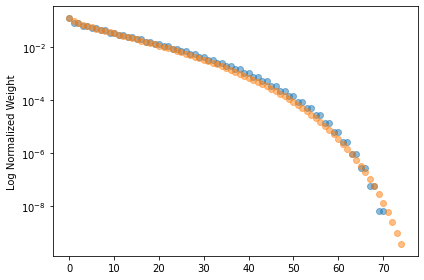

chop ind and its success 44 [0.13562651 0.11381308 0.11381308 0.10293109 0.10293109 0.09479064
 0.09479064 0.08802668 0.08802668 0.08212758 0.08212758 0.07683784
 0.07683784 0.07200873 0.07200873 0.06754492 0.06754492 0.06338121
 0.06338121 0.05947077 0.05947077 0.05577878 0.05577878 0.05227863
 0.05227863 0.04894954 0.04894954 0.04577502 0.04577502 0.04274184
 0.04274184 0.03983926 0.03983926 0.03705855 0.03705855 0.03439258
 0.03439258 0.03183555 0.03183555 0.02938279 0.02938279 0.02703055
 0.02703055 0.02477592 0.02477592] [0.42851054 0.37077722 0.34692433 0.32866488 0.3133094  0.29981568
 0.28764907 0.27649192 0.2661373  0.25644151 0.24729998 0.23863383
 0.23038184 0.2224954  0.21493516 0.20766877 0.20066923 0.19391381
 0.18738312 0.18106051 0.17493156 0.16898369 0.16320587 0.1575884
 0.15212266 0.14680101 0.14161661 0.13656335 0.13163576 0.12682891
 0.12213835 0.11756009 0.1130905  0.10872632 0.10446459 0.10030266
 0.0962381  0.09226875 0.08839266 0.08460807 0.08091341 0.07730727


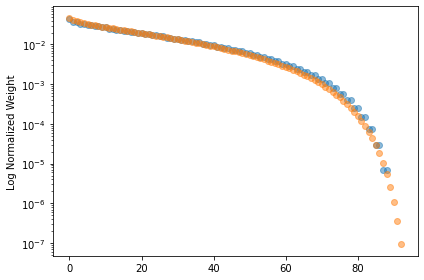

/Users/trentonbricken/SDM/SDM_Circ_Inter_Funcs.py:137: RuntimeWarning: divide by zero encountered in log
  return np.log(np.pi**( (n-1) /2) ) - scipy.special.loggamma( (n-1) /2) + np.log(r**(n-1)) + np.log(integral )


chop ind and its success 292 [4.48527977e-13 3.32504686e-13 3.32504686e-13 2.78170771e-13
 2.78170771e-13 2.40017156e-13 2.40017156e-13 2.10259122e-13
 2.10259122e-13 1.85897443e-13 1.85897443e-13 1.65391087e-13
 1.65391087e-13 1.47816655e-13 1.47816655e-13 1.32564919e-13
 1.32564919e-13 1.19206557e-13 1.19206557e-13 1.07424234e-13
 1.07424234e-13 9.69747888e-14 9.69747888e-14 8.76666146e-14
 8.76666146e-14 7.93453295e-14 7.93453295e-14 7.18842853e-14
 7.18842853e-14 6.51780349e-14 6.51780349e-14 5.91376951e-14
 5.91376951e-14 5.36875635e-14 5.36875635e-14 4.87625946e-14
 4.87625946e-14 4.43064770e-14 4.43064770e-14 4.02701435e-14
 4.02701435e-14 3.66105985e-14 3.66105985e-14 3.32899819e-14
 3.32899819e-14 3.02748125e-14 3.02748125e-14 2.75353699e-14
 2.75353699e-14 2.50451847e-14 2.50451847e-14 2.27806134e-14
 2.27806134e-14 2.07204819e-14 2.07204819e-14 1.88457836e-14
 1.88457836e-14 1.71394223e-14 1.71394223e-14 1.55859921e-14
 1.55859921e-14 1.41715876e-14 1.41715876e-14 1.28836391

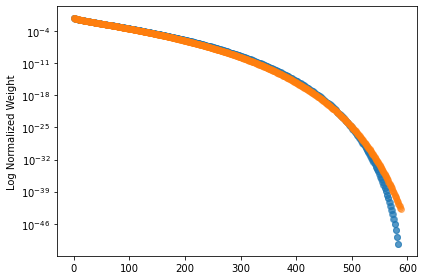

chop ind and its success 308 [1.07155669e-09 8.37199038e-10 8.37199038e-10 7.25207566e-10
 7.25207566e-10 6.44951607e-10 6.44951607e-10 5.81063276e-10
 5.81063276e-10 5.27674657e-10 5.27674657e-10 4.81796811e-10
 4.81796811e-10 4.41653043e-10 4.41653043e-10 4.06079417e-10
 4.06079417e-10 3.74260588e-10 3.74260588e-10 3.45596734e-10
 3.45596734e-10 3.19629810e-10 3.19629810e-10 2.95999642e-10
 2.95999642e-10 2.74416255e-10 2.74416255e-10 2.54641644e-10
 2.54641644e-10 2.36477288e-10 2.36477288e-10 2.19755347e-10
 2.19755347e-10 2.04332270e-10 2.04332270e-10 1.90084058e-10
 1.90084058e-10 1.76902675e-10 1.76902675e-10 1.64693288e-10
 1.64693288e-10 1.53372102e-10 1.53372102e-10 1.42864644e-10
 1.42864644e-10 1.33104387e-10 1.33104387e-10 1.24031628e-10
 1.24031628e-10 1.15592570e-10 1.15592570e-10 1.07738559e-10
 1.07738559e-10 1.00425447e-10 1.00425447e-10 9.36130561e-11
 9.36130561e-11 8.72647241e-11 8.72647241e-11 8.13469143e-11
 8.13469143e-11 7.58288819e-11 7.58288819e-11 7.06823852

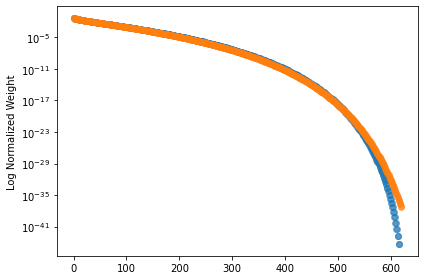

chop ind and its success 314 [1.40076402e-08 1.11529180e-08 1.11529180e-08 9.77973684e-09
 9.77973684e-09 8.78914752e-09 8.78914752e-09 7.99531881e-09
 7.99531881e-09 7.32750035e-09 7.32750035e-09 6.74975974e-09
 6.74975974e-09 6.24079934e-09 6.24079934e-09 5.78670519e-09
 5.78670519e-09 5.37775542e-09 5.37775542e-09 5.00681463e-09
 5.00681463e-09 4.66844524e-09 4.66844524e-09 4.35837904e-09
 4.35837904e-09 4.07318471e-09 4.07318471e-09 3.81004906e-09
 3.81004906e-09 3.56662749e-09 3.56662749e-09 3.34093860e-09
 3.34093860e-09 3.13128801e-09 3.13128801e-09 2.93621177e-09
 2.93621177e-09 2.75443375e-09 2.75443375e-09 2.58483278e-09
 2.58483278e-09 2.42641707e-09 2.42641707e-09 2.27830387e-09
 2.27830387e-09 2.13970323e-09 2.13970323e-09 2.00990479e-09
 2.00990479e-09 1.88826697e-09 1.88826697e-09 1.77420803e-09
 1.77420803e-09 1.66719864e-09 1.66719864e-09 1.56675557e-09
 1.56675557e-09 1.47243641e-09 1.47243641e-09 1.38383506e-09
 1.38383506e-09 1.30057782e-09 1.30057782e-09 1.22232003

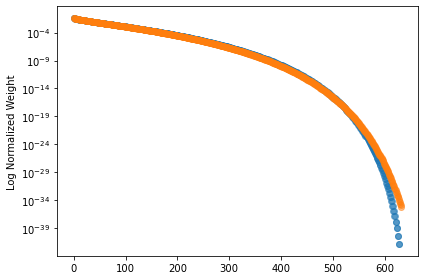

chop ind and its success 332 [1.03236840e-05 8.67753363e-06 8.67753363e-06 7.87244143e-06
 7.87244143e-06 7.28188454e-06 7.28188454e-06 6.80062016e-06
 6.80062016e-06 6.38886132e-06 6.38886132e-06 6.02654814e-06
 6.02654814e-06 5.70187872e-06 5.70187872e-06 5.40719971e-06
 5.40719971e-06 5.13720252e-06 5.13720252e-06 4.88801846e-06
 4.88801846e-06 4.65671942e-06 4.65671942e-06 4.44102177e-06
 4.44102177e-06 4.23910079e-06 4.23910079e-06 4.04946880e-06
 4.04946880e-06 3.87089223e-06 3.87089223e-06 3.70233342e-06
 3.70233342e-06 3.54290855e-06 3.54290855e-06 3.39185663e-06
 3.39185663e-06 3.24851621e-06 3.24851621e-06 3.11230750e-06
 3.11230750e-06 2.98271843e-06 2.98271843e-06 2.85929374e-06
 2.85929374e-06 2.74162617e-06 2.74162617e-06 2.62934948e-06
 2.62934948e-06 2.52213260e-06 2.52213260e-06 2.41967494e-06
 2.41967494e-06 2.32170244e-06 2.32170244e-06 2.22796429e-06
 2.22796429e-06 2.13823012e-06 2.13823012e-06 2.05228769e-06
 2.05228769e-06 1.96994086e-06 1.96994086e-06 1.89100788

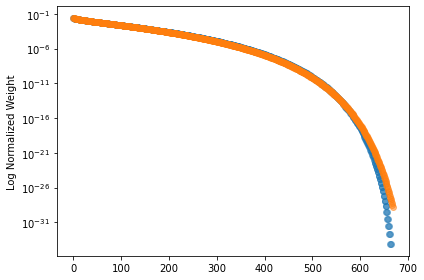

chop ind and its success 345 [4.42111351e-04 3.85526793e-04 3.85526793e-04 3.57597972e-04
 3.57597972e-04 3.36921896e-04 3.36921896e-04 3.19915574e-04
 3.19915574e-04 3.05229319e-04 3.05229319e-04 2.92185192e-04
 2.92185192e-04 2.80385885e-04 2.80385885e-04 2.69574779e-04
 2.69574779e-04 2.59574600e-04 2.59574600e-04 2.50256692e-04
 2.50256692e-04 2.41524087e-04 2.41524087e-04 2.33301481e-04
 2.33301481e-04 2.25528956e-04 2.25528956e-04 2.18157867e-04
 2.18157867e-04 2.11148049e-04 2.11148049e-04 2.04465856e-04
 2.04465856e-04 1.98082748e-04 1.98082748e-04 1.91974251e-04
 1.91974251e-04 1.86119176e-04 1.86119176e-04 1.80499023e-04
 1.80499023e-04 1.75097513e-04 1.75097513e-04 1.69900227e-04
 1.69900227e-04 1.64894311e-04 1.64894311e-04 1.60068244e-04
 1.60068244e-04 1.55411648e-04 1.55411648e-04 1.50915127e-04
 1.50915127e-04 1.46570141e-04 1.46570141e-04 1.42368894e-04
 1.42368894e-04 1.38304247e-04 1.38304247e-04 1.34369636e-04
 1.34369636e-04 1.30559009e-04 1.30559009e-04 1.26866771

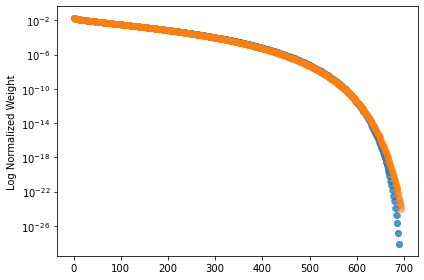

chop ind and its success 349 [1.18928348e-03 1.04841333e-03 1.04841333e-03 9.78719297e-04
 9.78719297e-04 9.27001696e-04 9.27001696e-04 8.84362081e-04
 8.84362081e-04 8.47451408e-04 8.47451408e-04 8.14589004e-04
 8.14589004e-04 7.84790825e-04 7.84790825e-04 7.57421896e-04
 7.57421896e-04 7.32044007e-04 7.32044007e-04 7.08339455e-04
 7.08339455e-04 6.86069035e-04 6.86069035e-04 6.65047180e-04
 6.65047180e-04 6.45126394e-04 6.45126394e-04 6.26187070e-04
 6.26187070e-04 6.08130557e-04 6.08130557e-04 5.90874306e-04
 5.90874306e-04 5.74348380e-04 5.74348380e-04 5.58492873e-04
 5.58492873e-04 5.43255980e-04 5.43255980e-04 5.28592522e-04
 5.28592522e-04 5.14462792e-04 5.14462792e-04 5.00831660e-04
 5.00831660e-04 4.87667848e-04 4.87667848e-04 4.74943355e-04
 4.74943355e-04 4.62632981e-04 4.62632981e-04 4.50713945e-04
 4.50713945e-04 4.39165562e-04 4.39165562e-04 4.27968972e-04
 4.27968972e-04 4.17106922e-04 4.17106922e-04 4.06563571e-04
 4.06563571e-04 3.96324328e-04 3.96324328e-04 3.86375715

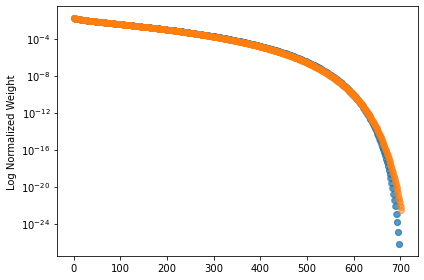

chop ind and its success 374 [0.10563615 0.09911258 0.09911258 0.09585315 0.09585315 0.09341036
 0.09341036 0.0913762  0.0913762  0.08959763 0.08959763 0.08799812
 0.08799812 0.08653301 0.08653301 0.08517359 0.08517359 0.08390012
 0.08390012 0.08269834 0.08269834 0.08155755 0.08155755 0.08046947
 0.08046947 0.07942757 0.07942757 0.07842655 0.07842655 0.07746207
 0.07746207 0.07653051 0.07653051 0.07562881 0.07562881 0.07475438
 0.07475438 0.07390495 0.07390495 0.07307859 0.07307859 0.07227358
 0.07227358 0.07148843 0.07148843 0.07072179 0.07072179 0.0699725
 0.0699725  0.06923947 0.06923947 0.06852176 0.06852176 0.06781849
 0.06781849 0.06712889 0.06712889 0.06645223 0.06645223 0.06578787
 0.06578787 0.0651352  0.0651352  0.06449368 0.06449368 0.06386279
 0.06386279 0.06324207 0.06324207 0.06263109 0.06263109 0.06202943
 0.06202943 0.06143673 0.06143673 0.06085264 0.06085264 0.06027682
 0.06027682 0.05970897 0.05970897 0.05914881 0.05914881 0.05859607
 0.05859607 0.05805049 0.05805049 

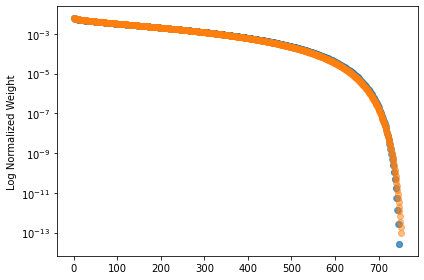

chop ind and its success 387 [4.49652504e-13 3.46552556e-13 3.46552556e-13 2.97568493e-13
 2.97568493e-13 2.62666512e-13 2.62666512e-13 2.35041027e-13
 2.35041027e-13 2.12086647e-13 2.12086647e-13 1.92472855e-13
 1.92472855e-13 1.75406852e-13 1.75406852e-13 1.60368140e-13
 1.60368140e-13 1.46991422e-13 1.46991422e-13 1.35007551e-13
 1.35007551e-13 1.24210759e-13 1.24210759e-13 1.14439115e-13
 1.14439115e-13 1.05562198e-13 1.05562198e-13 9.74729573e-14
 9.74729573e-14 9.00821342e-14 9.00821342e-14 8.33143175e-14
 8.33143175e-14 7.71050777e-14 7.71050777e-14 7.13988380e-14
 7.13988380e-14 6.61472591e-14 6.61472591e-14 6.13079935e-14
 6.13079935e-14 5.68437080e-14 5.68437080e-14 5.27213075e-14
 5.27213075e-14 4.89113101e-14 4.89113101e-14 4.53873378e-14
 4.53873378e-14 4.21256986e-14 4.21256986e-14 3.91050387e-14
 3.91050387e-14 3.63060525e-14 3.63060525e-14 3.37112365e-14
 3.37112365e-14 3.13046815e-14 3.13046815e-14 2.90718942e-14
 2.90718942e-14 2.69996440e-14 2.69996440e-14 2.50758299

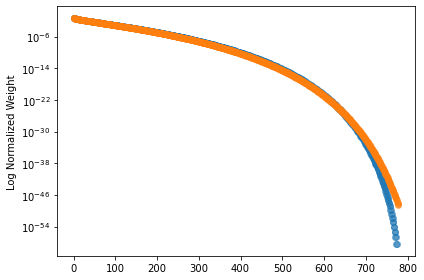

chop ind and its success 405 [1.02229114e-09 8.23931936e-10 8.23931936e-10 7.28206401e-10
 7.28206401e-10 6.58922773e-10 6.58922773e-10 6.03213608e-10
 6.03213608e-10 5.56186604e-10 5.56186604e-10 5.15360556e-10
 5.15360556e-10 4.79266904e-10 4.79266904e-10 4.46947579e-10
 4.46947579e-10 4.17734092e-10 4.17734092e-10 3.91136463e-10
 3.91136463e-10 3.66781779e-10 3.66781779e-10 3.44377680e-10
 3.44377680e-10 3.23689396e-10 3.23689396e-10 3.04524649e-10
 3.04524649e-10 2.86723341e-10 2.86723341e-10 2.70150292e-10
 2.70150292e-10 2.54689983e-10 2.54689983e-10 2.40242672e-10
 2.40242672e-10 2.26721456e-10 2.26721456e-10 2.14050016e-10
 2.14050016e-10 2.02160858e-10 2.02160858e-10 1.90993919e-10
 1.90993919e-10 1.80495451e-10 1.80495451e-10 1.70617117e-10
 1.70617117e-10 1.61315255e-10 1.61315255e-10 1.52550260e-10
 1.52550260e-10 1.44286079e-10 1.44286079e-10 1.36489782e-10
 1.36489782e-10 1.29131202e-10 1.29131202e-10 1.22182621e-10
 1.22182621e-10 1.15618514e-10 1.15618514e-10 1.09415314

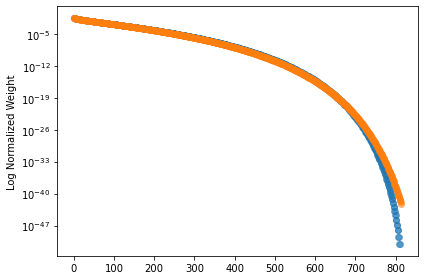

chop ind and its success 411 [1.00266618e-08 8.19839146e-09 8.19839146e-09 7.31206539e-09
 7.31206539e-09 6.66762576e-09 6.66762576e-09 6.14706379e-09
 6.14706379e-09 5.70559948e-09 5.70559948e-09 5.32056777e-09
 5.32056777e-09 4.97858102e-09 4.97858102e-09 4.67092279e-09
 4.67092279e-09 4.39152307e-09 4.39152307e-09 4.13594098e-09
 4.13594098e-09 3.90080259e-09 3.90080259e-09 3.68346702e-09
 3.68346702e-09 3.48181674e-09 3.48181674e-09 3.29411977e-09
 3.29411977e-09 3.11893562e-09 3.11893562e-09 2.95504919e-09
 2.95504919e-09 2.80142296e-09 2.80142296e-09 2.65716164e-09
 2.65716164e-09 2.52148552e-09 2.52148552e-09 2.39371002e-09
 2.39371002e-09 2.27322976e-09 2.27322976e-09 2.15950594e-09
 2.15950594e-09 2.05205628e-09 2.05205628e-09 1.95044685e-09
 1.95044685e-09 1.85428542e-09 1.85428542e-09 1.76321591e-09
 1.76321591e-09 1.67691390e-09 1.67691390e-09 1.59508269e-09
 1.59508269e-09 1.51745014e-09 1.51745014e-09 1.44376584e-09
 1.44376584e-09 1.37379881e-09 1.37379881e-09 1.30733545

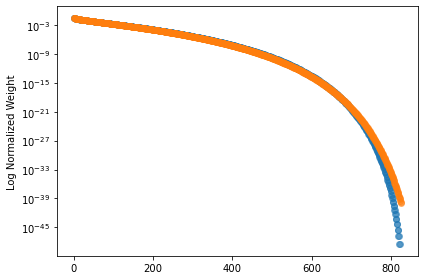

chop ind and its success 433 [1.26718894e-05 1.08997526e-05 1.08997526e-05 1.00285171e-05
 1.00285171e-05 9.38607427e-06 9.38607427e-06 8.85974181e-06
 8.85974181e-06 8.40700676e-06 8.40700676e-06 8.00648014e-06
 8.00648014e-06 7.64560563e-06 7.64560563e-06 7.31625890e-06
 7.31625890e-06 7.01281760e-06 7.01281760e-06 6.73119388e-06
 6.73119388e-06 6.46830102e-06 6.46830102e-06 6.22173739e-06
 6.22173739e-06 5.98958848e-06 5.98958848e-06 5.77029709e-06
 5.77029709e-06 5.56257502e-06 5.56257502e-06 5.36534115e-06
 5.36534115e-06 5.17767673e-06 5.17767673e-06 4.99879247e-06
 4.99879247e-06 4.82800384e-06 4.82800384e-06 4.66471203e-06
 4.66471203e-06 4.50838933e-06 4.50838933e-06 4.35856748e-06
 4.35856748e-06 4.21482840e-06 4.21482840e-06 4.07679682e-06
 4.07679682e-06 3.94413408e-06 3.94413408e-06 3.81653326e-06
 3.81653326e-06 3.69371493e-06 3.69371493e-06 3.57542376e-06
 3.57542376e-06 3.46142557e-06 3.46142557e-06 3.35150485e-06
 3.35150485e-06 3.24546272e-06 3.24546272e-06 3.14311504

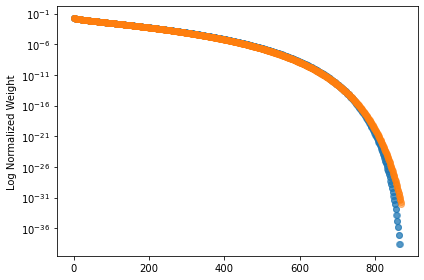

chop ind and its success 447 [4.44992982e-04 3.94578822e-04 3.94578822e-04 3.69625228e-04
 3.69625228e-04 3.51099030e-04 3.51099030e-04 3.35817096e-04
 3.35817096e-04 3.22581585e-04 3.22581585e-04 3.10791453e-04
 3.10791453e-04 3.00094835e-04 3.00094835e-04 2.90264712e-04
 2.90264712e-04 2.81144435e-04 2.81144435e-04 2.72620446e-04
 2.72620446e-04 2.64607258e-04 2.64607258e-04 2.57038561e-04
 2.57038561e-04 2.49861658e-04 2.49861658e-04 2.43033821e-04
 2.43033821e-04 2.36519813e-04 2.36519813e-04 2.30290155e-04
 2.30290155e-04 2.24319873e-04 2.24319873e-04 2.18587581e-04
 2.18587581e-04 2.13074788e-04 2.13074788e-04 2.07765368e-04
 2.07765368e-04 2.02645156e-04 2.02645156e-04 1.97701617e-04
 1.97701617e-04 1.92923596e-04 1.92923596e-04 1.88301109e-04
 1.88301109e-04 1.83825171e-04 1.83825171e-04 1.79487664e-04
 1.79487664e-04 1.75281215e-04 1.75281215e-04 1.71199107e-04
 1.71199107e-04 1.67235197e-04 1.67235197e-04 1.63383843e-04
 1.63383843e-04 1.59639853e-04 1.59639853e-04 1.55998431

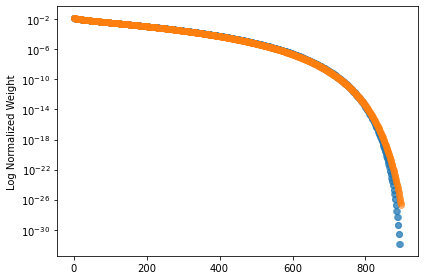

chop ind and its success 451 [1.07185005e-03 9.58436527e-04 9.58436527e-04 9.02208105e-04
 9.02208105e-04 8.60394029e-04 8.60394029e-04 8.25845404e-04
 8.25845404e-04 7.95873633e-04 7.95873633e-04 7.69130488e-04
 7.69130488e-04 7.44827182e-04 7.44827182e-04 7.22455126e-04
 7.22455126e-04 7.01663614e-04 7.01663614e-04 6.82198589e-04
 6.82198589e-04 6.63868925e-04 6.63868925e-04 6.46526476e-04
 6.46526476e-04 6.30053593e-04 6.30053593e-04 6.14354955e-04
 6.14354955e-04 5.99352010e-04 5.99352010e-04 5.84979092e-04
 5.84979092e-04 5.71180612e-04 5.71180612e-04 5.57909004e-04
 5.57909004e-04 5.45123173e-04 5.45123173e-04 5.32787311e-04
 5.32787311e-04 5.20869982e-04 5.20869982e-04 5.09343401e-04
 5.09343401e-04 4.98182852e-04 4.98182852e-04 4.87366233e-04
 4.87366233e-04 4.76873676e-04 4.76873676e-04 4.66687235e-04
 4.66687235e-04 4.56790635e-04 4.56790635e-04 4.47169054e-04
 4.47169054e-04 4.37808946e-04 4.37808946e-04 4.28697887e-04
 4.28697887e-04 4.19824449e-04 4.19824449e-04 4.11178086

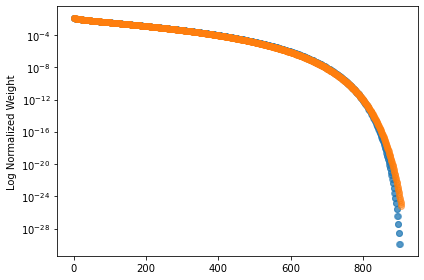

chop ind and its success 480 [0.10872415 0.10282684 0.10282684 0.09987972 0.09987972 0.09767056
 0.09767056 0.09583056 0.09583056 0.09422143 0.09422143 0.092774
 0.092774   0.0914479  0.0914479  0.0902172  0.0902172  0.08906406
 0.08906406 0.08797559 0.08797559 0.08694213 0.08694213 0.0859562
 0.0859562  0.08501188 0.08501188 0.08410441 0.08410441 0.08322986
 0.08322986 0.08238495 0.08238495 0.08156693 0.08156693 0.08077343
 0.08077343 0.08000244 0.08000244 0.0792522  0.0792522  0.07852115
 0.07852115 0.07780794 0.07780794 0.07711137 0.07711137 0.07643037
 0.07643037 0.07576398 0.07576398 0.07511132 0.07511132 0.07447162
 0.07447162 0.07384417 0.07384417 0.07322832 0.07322832 0.07262349
 0.07262349 0.07202912 0.07202912 0.07144473 0.07144473 0.07086985
 0.07086985 0.07030407 0.07030407 0.06974698 0.06974698 0.06919822
 0.06919822 0.06865745 0.06865745 0.06812437 0.06812437 0.06759866
 0.06759866 0.06708006 0.06708006 0.0665683  0.0665683  0.06606315
 0.06606315 0.06556436 0.06556436 0.

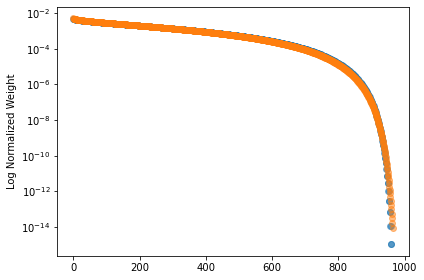

OverflowError: (34, 'Result too large')

In [14]:
nvals = [64, 100,784, 1000,10000] #784 for MNIST
space_frac_rang = [4*(10**(-13)), 0.000000001, 0.00000001, 0.00001, 0.00037, 0.001, 0.1]
hamm_distances = []

fit_to_curve = True # only fit to the actual part of the circle intersection. 
attention_params = True 
# plotting functions. 
normalize=True

types_to_plot = 'cont_bin_comp' #'binary', 'continuous', 'all', 'cont_bin_comp'

if attention_params: 
    r = 2**64#1000000#2**64
    n_points = 1024#1024
else: 
    r = 1000000 #2**64#1000000#2**64
    n_points = 100 #1024#100#1024
    
for use_log in [True, False]:
    if use_log: 
        constrain_xax = True
    else: 
        constrain_xax = False
    for n in nvals: 
        hamm_distances = space_frac_to_hamm_dist(n, space_frac_rang)
        
        dvs = np.linspace(0,n,n_points).astype(int)
        dvs = np.unique(dvs)
        cs_v = hamm_to_cosine(dvs,n) # for the softmax
        cont_cs_v = np.copy(cs_v)
        cont_cs_v[0] = cont_cs_v[0] - 1e-15
        assert cont_cs_v[0] != 'should not be 1 else will throw a division error in the equation.'
            
        for ind, hamm_dist in enumerate(hamm_distances): 
            
            res = expected_intersection_interpretable(n, dvs, hamm_dist, r)
            res = np.nan_to_num(res, nan=0.0)

            cap_res = cap_intersection(n, cont_cs_v, hamm_dist, r)
            cap_res = np.nan_to_num(cap_res, nan=0.0)

            chop_ind = int( (hamm_dist)//(n/len(dvs)) )

            chopped_dvs = dvs[:chop_ind]
            chopped_cs_v = cs_v[:chop_ind]
            chopped_res = res[:chop_ind]
            chopped_cont_cs_v = cont_cs_v[:chop_ind] # intersect falls off at one value closer.
            chopped_cap_res = cap_res[:chop_ind]

            #print('chop ind and its success', chop_ind, res[:chop_ind+1], cap_res[:chop_ind])

            assert (chopped_res<=0.0).sum()==0, "Chopped ind is incorrect"
            assert (chopped_cap_res<=0.0).sum()==0, "Chopped ind is incorrect"

            bin_beta,bin_bias = fit_beta_regression(n, chopped_cs_v, chopped_res, return_bias=True, ham_input=False )
            cap_beta,cap_bias = fit_beta_regression(n, chopped_cont_cs_v, chopped_cap_res, return_bias=True, ham_input=False)

            # gold standard softmax fit: 
            bin_sm_beta = fit_softmax_backprop(n, cs_v, res, ham_input=False, plot_losses=False)
            cap_sm_beta = fit_softmax_backprop(n, cont_cs_v, cap_res, ham_input=False, plot_losses=False)
            print('binary and cont betas', bin_beta, cap_beta)
            print("binary and cont softmax betas", bin_sm_beta, cap_sm_beta)

            if types_to_plot == 'binary':
                plabels = ['Circle Intersection', 'Softmax w/ fitted '+ r'$\beta$']#['Bin. Circle Intersect','Bin. Exp w/ fitted '+ r'$\beta$ Regression']
                pvals =[res, bin_beta]
                beta_postfix = " | Fitted "+r'$\beta=$'+str(round(bin_beta,3))
            elif types_to_plot == 'continuous':
                plabels = ['Cont. Circle Intersect','Cont. Exp w/ fitted '+ r'$\beta$ Regression']
                pvals = [cap_res, cap_beta]
                beta_postfix = " | Fitted "+r'$\beta=$'+str(round(cap_beta,3))
            elif types_to_plot == 'cont_bin_comp':
                # compare continuous to binary circle intersections
                plabels = ['Bin. Circle Intersect','Cont. Circle Intersect']
                pvals = [res, cap_res]
                beta_postfix = ''
            elif types_to_plot=='all': 
                plabels = ['Bin. Circle Intersect', 'Cont. Circle Intersect', 
                           'Bin. Exp w/ fitted '+ r'$\beta$ Regression', 
                           'Cont. Exp w/ fitted '+ r'$\beta$ Regression']
                pvals = [res, cap_res, bin_beta, cap_beta]
                display_beta = " | Fitted Bin. "+r'$\beta=$'+str(round(bin_beta,3)) + " | Fitted Cont. "+r'$\beta=$'+str(round(cap_beta,3))
            for label, vals in zip(plabels, pvals):
                if normalize: 
                    if "Intersect" in label: 
                        toplot = vals/sum(vals)
                    elif "fitted" in label:
                        toplot = softmax(cs_v, vals)
                else: 
                    if "Intersect" in label: 
                        toplot = vals
                    elif "fitted" in label:
                        toplot = np.exp(cs_v*vals) # vals is beta here. 
                    else: 
                        raise Exception("Need to ensure labels are being used")

                #if use_log and hamm_dist<10:
                #    plt.scatter(dvs[:chop_ind*2+5], toplot[:chop_ind*2+5], label=label, alpha=0.5)
                if constrain_xax: 
                    plt.scatter(dvs[:chop_ind*2 +5], toplot[:chop_ind*2 +5], label=label, alpha=0.5)
                else: 
                    plt.scatter(dvs, toplot, label=label, alpha=0.5)

            if use_log:
                plt.yscale('log')
                text_prefix = "Log "
            else: 
                text_prefix = ""
                plt.legend()
                #plt.xlim([-0.1, chop_ind+10])
                #print('learned softmax beta vs attention beta:', bin_beta, 1/np.sqrt(n))
                plt.xlabel('Hamming Distance between vectors, $d_v$')
            
            if normalize: 
                plt.ylabel(text_prefix+'Normalized Weight')
                if not use_log: 
                    plt.title(text_prefix+"Normalized Weights for Circle Intersections \n"+"$n$="+str(n)+" | $d$="+str(hamm_dist)+" | $p=$"+str(space_frac_rang[ind])+beta_postfix)
            else: 
                plt.ylabel(text_prefix+'Circle Intersection')
                if not use_log: 
                    plt.title(text_prefix+"Expected Circle Intersections \n"+"$n$="+str(n)+" | $d$="+str(hamm_dist)+" | $p=$"+str(space_frac_rang[ind])+beta_postfix)
            #plt.xlim([-1,chop_ind*2 +15])
            plt.tight_layout()
            # MAKE SURE I UPDATE FOR WHAT KIND OF PLOT IS BEING MADE HERE. 
            plt.gcf().savefig('figures/SoftmaxComparison/SoftmaxComparison_'+types_to_plot+'_AttentionParams'+str(attention_params)+"normalized"+str(normalize)+"Logged="+str(use_log)+"N="+str(n)+'_'+str(hamm_dist)+'.png', dpi=250)
            plt.show()
            #break 
        #break 
    #break 

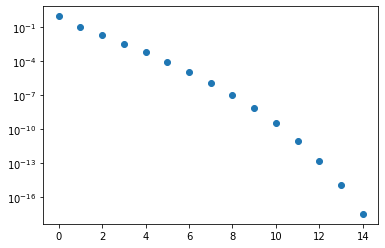

In [46]:
cut_ind = 15
plt.scatter(dvs[:cut_ind], toplot[:cut_ind], label=label, alpha=1.0)
#plt.ylim([min(toplot[:cut_ind])-0.01,max(toplot[:cut_ind])])
plt.yscale('log')


In [35]:
toplot

array([8.81538559e-01, 9.59074557e-02, 1.84030366e-02, 3.45231567e-03,
       5.94631641e-04, 9.07166121e-05, 1.18761106e-05, 1.28945071e-06,
       1.11499355e-07, 7.29612114e-09, 3.37820406e-10, 1.00953564e-11,
       1.70734749e-13, 1.34059963e-15, 3.55097285e-18, 1.80045498e-21,
       5.46932116e-26, 4.63202370e-33, 2.55221841e-49, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [3]:
n=64
r = 1000000 #2**64#1000000#2**64
n_points = 100 #1024#100#1024
hamm_dist = 11
rad = 1 # always unit norm due to L2 constraint.

Beta Fit MSE: 8505162610285.588
Beta Fit MSE: 2.079404098286369e+26
Beta Fit MSE: 6.290554047680983e+17
betas! 15.852765236405924 31.42300582303825 21.53974551313375


/Users/trentonbricken/SDM/SDM_Circ_Inter_Funcs.py:261: RuntimeWarning: divide by zero encountered in log
  expected_intersect = perc_addresses_w_neurons + np.log(possible_addresses)


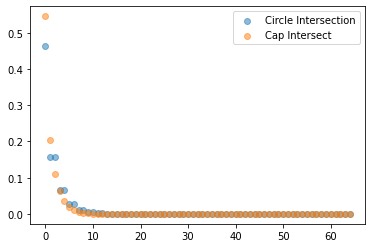

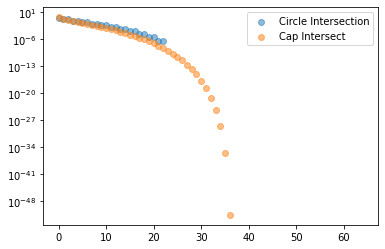

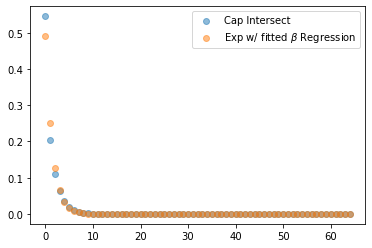

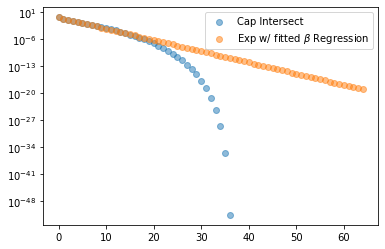

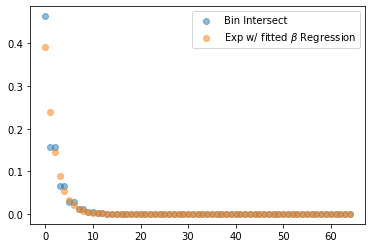

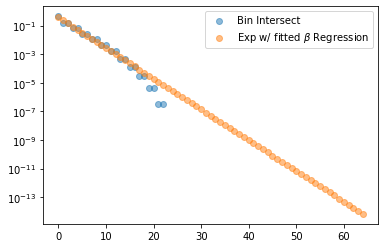

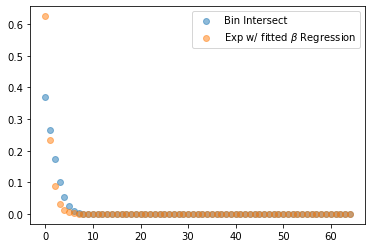

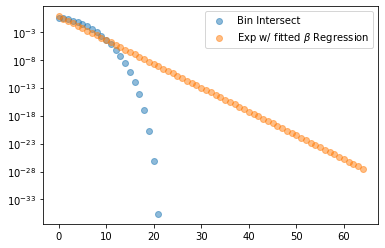

In [5]:
dvs = np.linspace(0,n,n_points).astype(int) #np.asarray([100,490,495,498,499,500,501,502,504,506,508]) #
dvs = np.unique(dvs)
cs_v = hamm_to_cosine(dvs,n) # for the softmax

chop_ind = int( (hamm_dist*2+1)//(n/len(dvs)) )
chopped_dvs = dvs[:chop_ind]
chopped_cs_v = cs_v[:chop_ind]

dvs = np.linspace(0,n,n_points).astype(int)
dvs = np.unique(dvs)
cs_v = hamm_to_cosine(dvs,n) # for the softmax
res = expected_intersection_interpretable(n, dvs, hamm_dist, r)
res = np.nan_to_num(res, nan=0.0)

cont_cs_v = np.copy(cs_v)
cont_cs_v[0] = cont_cs_v[0] - 1e-15
assert cont_cs_v[0] != 'should not be 1 else will throw a division error in the equation.'
cont_res = sphere_continuous_space_intersection( n, cont_cs_v, hamm_dist, ham_input=False)

cap_res = cap_intersection(n, cont_cs_v, hamm_dist)
cap_res = np.nan_to_num(cap_res, nan=0.0)

chop_ind = int( (hamm_dist)//(n/len(dvs)) )

chopped_dvs = dvs[:chop_ind]
chopped_cs_v = cs_v[:chop_ind]
chopped_res = res[:chop_ind]

chopped_cont_cs_v = cont_cs_v[:chop_ind] # intersect falls off at one value closer.
chopped_cont_res = cont_res[:chop_ind]
chopped_cap_res = cap_res[:chop_ind]
#print('chop ind and its success', chop_ind, res[:chop_ind+1], cont_res[:chop_ind], cap_res[:chop_ind+1])

assert (chopped_res<=0.0).sum()==0, "Chopped ind is incorrect"
assert (chopped_cont_res<=0.0).sum()==0, "Chopped ind is incorrect"

bin_beta,bin_bias = fit_beta_regression(n, chopped_cs_v, chopped_res, return_bias=True, ham_input=False )
cont_beta,cont_bias = fit_beta_regression(n, chopped_cont_cs_v, chopped_cont_res, return_bias=True, ham_input=False)
        
cap_beta,cap_bias = fit_beta_regression(n, chopped_cont_cs_v, chopped_cap_res, return_bias=True, ham_input=False)
print('betas!', bin_beta, cont_beta, cap_beta)
plt.scatter(dvs, res/sum(res), label='Circle Intersection', alpha=0.5)
#plt.scatter(dvs, cont_res/sum(cont_res), label="Cont. Intersect", alpha=0.5)
plt.scatter(dvs, cap_res/sum(cap_res), label="Cap Intersect", alpha=0.5)
plt.legend()
plt.show()

plt.scatter(dvs, res/sum(res), label='Circle Intersection', alpha=0.5)
#plt.scatter(dvs, cont_res/sum(cont_res), label="Cont. Intersect", alpha=0.5)
plt.scatter(dvs, cap_res/sum(cap_res), label="Cap Intersect", alpha=0.5)
plt.yscale('log')
plt.legend()
plt.show()

plt.scatter(dvs, cap_res/sum(cap_res), label="Cap Intersect", alpha=0.5)
plt.scatter(dvs, softmax(cs_v, cap_beta), label="Exp w/ fitted "+ r"$\beta$ Regression", alpha=0.5)
plt.legend()
plt.show()

plt.scatter(dvs, cap_res/sum(cap_res), label="Cap Intersect", alpha=0.5)
plt.scatter(dvs, softmax(cs_v, cap_beta), label="Exp w/ fitted "+ r"$\beta$ Regression", alpha=0.5)
plt.yscale('log')
plt.legend()
plt.show()

plt.scatter(dvs, res/sum(res), label="Bin Intersect", alpha=0.5)
plt.scatter(dvs, softmax(cs_v, bin_beta), label="Exp w/ fitted "+ r"$\beta$ Regression", alpha=0.5)
plt.legend()
plt.show()

plt.scatter(dvs, res/sum(res), label="Bin Intersect", alpha=0.5)
plt.scatter(dvs, softmax(cs_v, bin_beta), label="Exp w/ fitted "+ r"$\beta$ Regression", alpha=0.5)
plt.yscale('log')
plt.legend()
plt.show()

plt.scatter(dvs, cont_res/sum(cont_res), label="Bin Intersect", alpha=0.5)
plt.scatter(dvs, softmax(cs_v, cont_beta), label="Exp w/ fitted "+ r"$\beta$ Regression", alpha=0.5)
plt.legend()
plt.show()

plt.scatter(dvs, cont_res/sum(cont_res), label="Bin Intersect", alpha=0.5)
plt.scatter(dvs, softmax(cs_v, cont_beta), label="Exp w/ fitted "+ r"$\beta$ Regression", alpha=0.5)
plt.yscale('log')
plt.legend()
plt.show()


## Relating Learnt Beta to Hamming distance and fraction of the space

MSE: 3358246186730.816
-19.3852613966758


/Users/trentonbricken/SDM/SDM_Circ_Inter_Funcs.py:122: RuntimeWarning: divide by zero encountered in log
  expected_intersect = perc_addresses_w_neurons + np.log(possible_addresses)


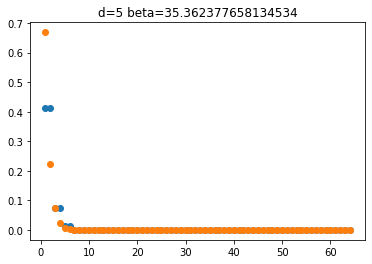

MSE: 494746754149237.3
-9.071061635465634


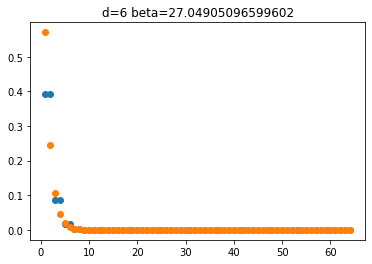

MSE: 4.917521770654703e+16
-5.584150365046185


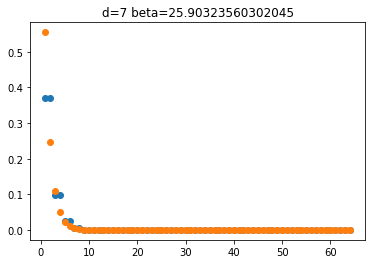

MSE: 3.4890719565688904e+18
0.7165150986722288


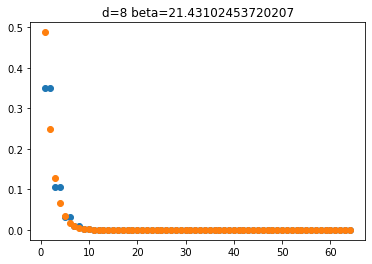

MSE: 1.8404013120007183e+20
4.070125546257721


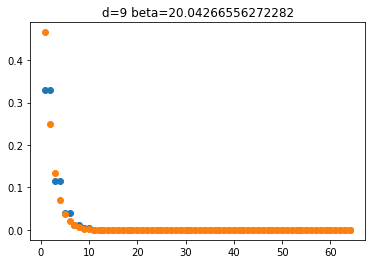

MSE: 7.446427397591388e+21
8.59109484471021


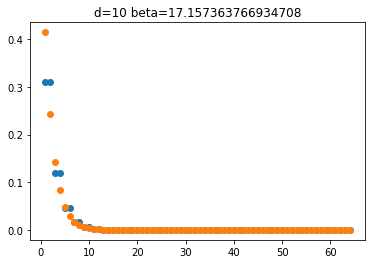

MSE: 2.368199684389012e+23
11.568590937189708


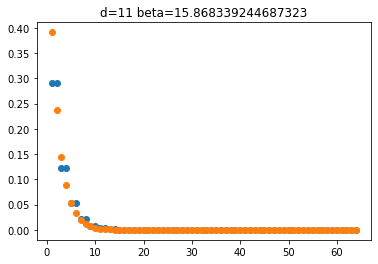

MSE: 6.039092380926927e+24
15.079182503182679


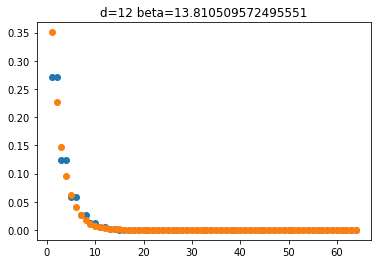

MSE: 1.2550915970382744e+26
17.68005507884874


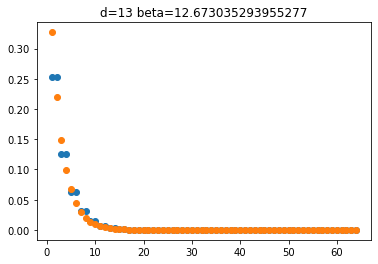

MSE: 2.1554369547290237e+27
20.523514600034638


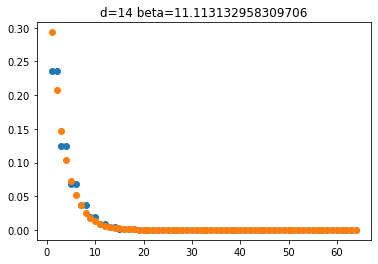

MSE: 3.0946263448293823e+28
22.784579330140105


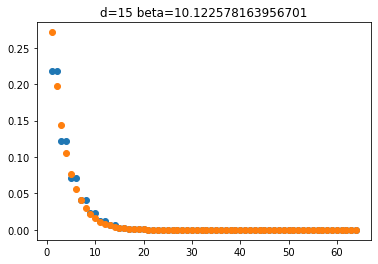

MSE: 3.75272591056551e+29
25.140684027063394


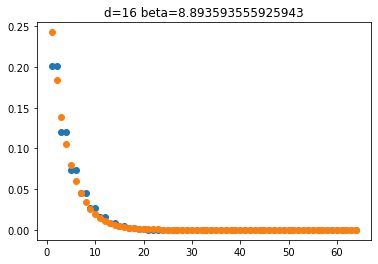

MSE: 3.877651538544868e+30
27.099380952540272


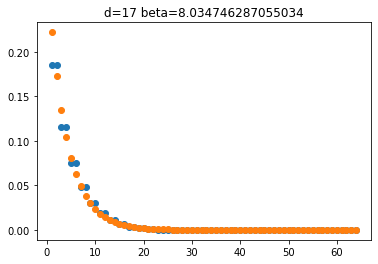

MSE: 3.4416616021751205e+31
29.07314768166922


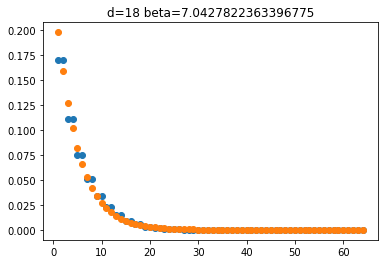

MSE: 2.642130321781819e+32
30.76095136828274


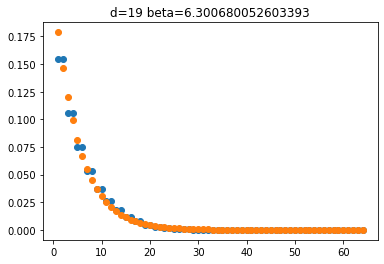

MSE: 1.766151473233366e+33
32.41877058848363


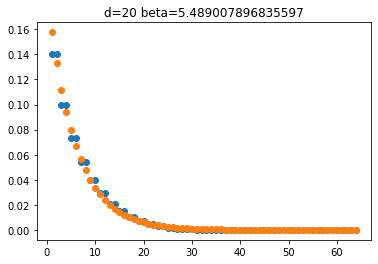

MSE: 1.033805863656846e+34
33.8610083766222


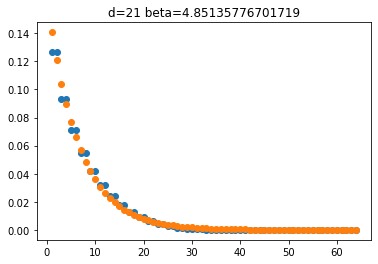

MSE: 5.33016141126881e+34
35.24749991422474


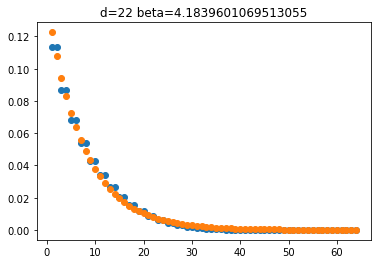

MSE: 2.4318948346450823e+35
36.4645102852391


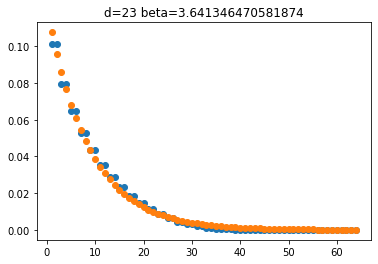

MSE: 9.872216280756693e+35
37.6113075532284


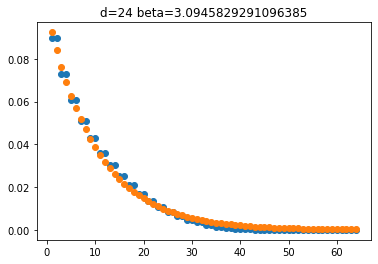

MSE: 3.578743367776027e+36
38.61979436703833


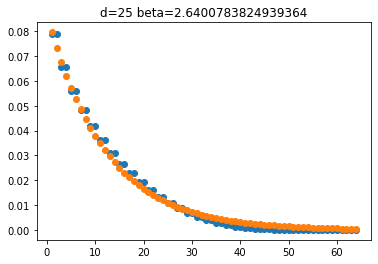

MSE: 1.1644337094787243e+37
39.55065610086857


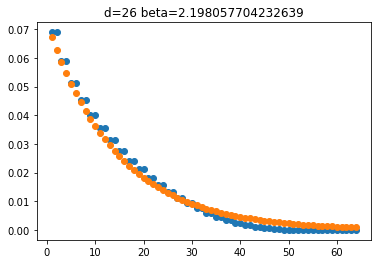

MSE: 3.4089558379416773e+37
40.36506763686691


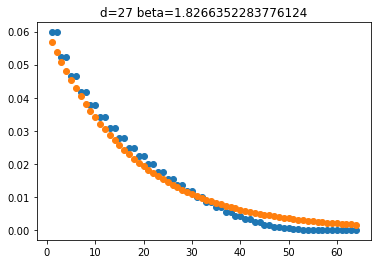

MSE: 9.021091500045557e+37
41.09930046460508


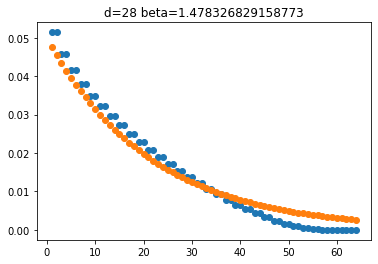

MSE: 2.1602128399158452e+38
41.733345162132316


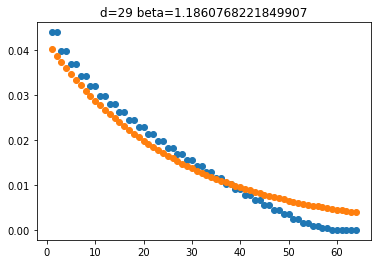

MSE: 4.699434005392256e+38
42.28857592625404


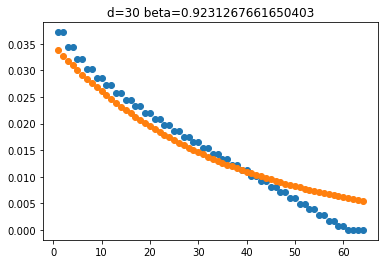

MSE: 9.291070613463979e+38
42.75707574079664


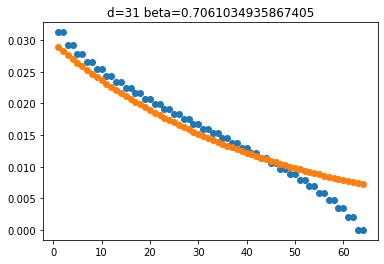

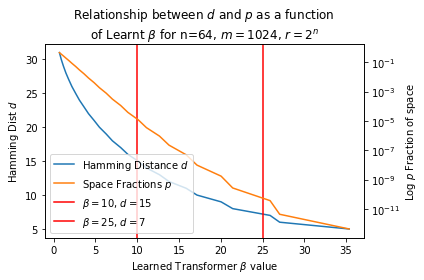

,0,1
0,5.0,35.362378
1,6.0,27.049051
2,7.0,25.903236
3,8.0,21.431025
4,9.0,20.042666
5,10.0,17.157364
6,11.0,15.868339
7,12.0,13.810510
8,13.0,12.673035
9,14.0,11.113133


In [34]:

n=64
d = np.arange(5,n//2).astype(int)
#space_frac_rang = [0.00000001, 0.00001, 0.001, 0.1]
dv = np.linspace(1,n, 1024).astype(int)
dv = np.unique(dv)
r = 2**n#256#1000000
#beta_d = -(n-2*d)**2 / 2
beta_cs = -(n-2*d)**2 / n
plot_fits = True
#plt.plot(d, beta_d)
#plt.show()
learned_betas = []
fit_to_curve = True
normalize=True
for hamm_dist in d: 
    res = expected_intersection_interpretable(n, dv, hamm_dist, r)    
    res = np.nan_to_num(res,nan=0.0)
    
    if fit_to_curve:
        # want to fit the regression to the circle intersection part
        # not to the whole circle intersect function
        chop_ind = int( (hamm_dist)//(n/len(dv)) )
        chopped_dvs = dv[:chop_ind]
        chopped_res = res[:chop_ind]
        fit_beta_res, beta = fit_beta_regression(n, chopped_dvs, chopped_res )
        cs_v = 1-(2*dv)/n
        print(bias)
        if normalize:
            fit_beta_res = softmax(cs_v, beta)
        else: 
            fit_beta_res = np.exp(beta*cs_v)*np.exp(bias)#softmax(cs_v, beta)
    else: 
        fit_beta_res, beta = fit_beta_regression(n, dv, res )
    
    #fit_beta_res, beta = fit_beta_regression(n, dv, res )
    
    if plot_fits:
        plt.figure()
        plt.scatter(dv,res/sum(res))
        plt.scatter(dv, fit_beta_res)
        plt.title('d='+str(hamm_dist)+" beta="+str(beta))
        plt.show()
    
    learned_betas.append(beta)
    
pvals = hamm_dist_to_space_frac(n, d)
    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
lns1 = ax1.plot(learned_betas, d, label=r"Hamming Distance $d$")
lns2 = ax2.plot(learned_betas, pvals, color='tab:orange', label='Space Fractions $p$')
lns3 = ax1.axvline(10, label=r"$\beta=10$, $d=15$", linestyle='solid',color='red')
lns4 = ax1.axvline(25, label=r"$\beta = 25$, $d=7$", linestyle='solid',color='red')

ax1.set_ylabel("Hamming Dist $d$")
ax1.set_xlabel(r"Learned Transformer $\beta$ value")#, color='g')
ax2.set_ylabel('Log $p$ Fraction of space')#, color='b')
ax2.set_yscale('log')

lns = lns1+lns2+[lns3] + [lns4]
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='lower left')

plt.title(r"Relationship between $d$ and $p$ as a function"+ "\n"+r"of Learnt $\beta$ for n="+str(n)+", $m=1024$, $r=2^n$")
plt.tight_layout()
plt.gcf().savefig('figures/Beta_d_p_relationships='+str(n)+'.png', dpi=250)
plt.show()
pd.DataFrame([d, learned_betas]).T

In [65]:
pvals

[4.5014084690611633e-13,
 4.514509480222501e-12,
 3.81907067277011e-11,
 1.771111690087537e-09,
 9.982491118931073e-09,
 2.2833053502227052e-07,
 9.404810782147002e-07,
 3.534743771272836e-06,
 3.866538440643517e-05,
 0.00011344119144164029,
 0.0007813946724140146,
 0.001844982138270023,
 0.008429095022140554,
 0.0163828795494116,
 0.029970594783499612,
 0.08432145571985172,
 0.13021773828832678,
 0.2661543880139208,
 0.35399037706738173,
 0.5496733768739839]

# Additional Plots not Used in the Paper

## Normalized Hamming distance plot. Uses vectors at possible d_v distance. 

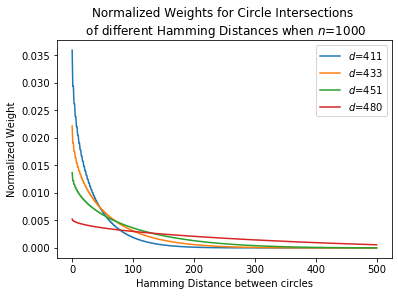

In [111]:
# portions of space within hamm_dist bits for: 0.00000001, 0.00001, 0.001, 0.1

space_frac_rang = [0.00000001, 0.00001, 0.001, 0.1]
n=1000
hamm_distances = space_frac_to_hamm_dist(n, space_frac_rang)
r = 1000000 # number of neurons

# whether to enforce a neuron limit or have r = 2^n
hard_mem_places = False

for hamm_dist in hamm_distances:
    
    # circles that have centers at all distances within this given range. 
    circle_center_distances = np.arange(0,n//2,1).astype(int) #np.arange(0,n//2,10).astype(int)
    res = expected_intersection_lune(n, circle_center_distances, hamm_dist, r)
    res = np.asarray(res)
    plt.plot(circle_center_distances, res/res.sum(), label="$d$="+str(hamm_dist))
    
plt.legend()
plt.xlabel('Hamming Distance between circles')
plt.ylabel('Normalized Weight')
plt.title("Normalized Weights for Circle Intersections \n of different Hamming Distances when $n$="+str(n))
plt.gcf().savefig('figures/CircleInterWeights.png', dpi=250)
plt.show()

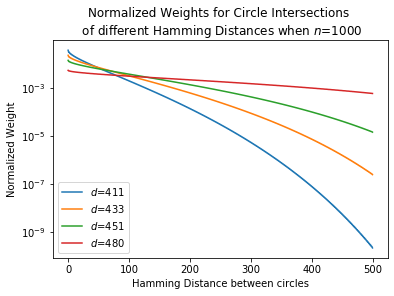

In [66]:
space_frac_rang = [0.00000001, 0.00001, 0.001, 0.1]
n=1000
hamm_distances = space_frac_to_hamm_dist(n, space_frac_rang)
r = 1000000 # number of neurons

# whether to enforce a neuron limit or have r = 2^n
hard_mem_places = False

for hamm_dist in hamm_distances:
    
    # circles that have centers at all distances within this given range. 
    circle_center_distances = np.arange(0,n//2,1).astype(int)
    
    res = expected_intersection_lune(n, circle_center_distances, hamm_dist, r)
        

    res = np.asarray(res)
    plt.plot(circle_center_distances, res/res.sum(), label="$d$="+str(hamm_dist))
    
plt.legend()
plt.xlabel('Hamming Distance between circles')
plt.ylabel('Normalized Weight')
plt.title("Normalized Weights for Circle Intersections \n of different Hamming Distances when $n$="+str(n))
plt.yscale('log')
plt.gcf().savefig('figures/CircleInterWeights_Log.png', dpi=250)
plt.show()

## Plotting with much smaller n=64 that is common in Transformer self Attention

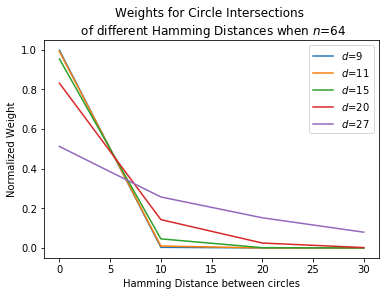

In [15]:
space_frac_rang = [0.000000001,0.00000001, 0.00001, 0.001, 0.1]
n=64
hamm_distances = space_frac_to_hamm_dist(n, space_frac_rang)
r = 1000000 # number of neurons

# whether to enforce a neuron limit or have r = 2^n
hard_mem_places = False

for hamm_dist in hamm_distances:
    circle_center_distances = np.arange(0,n//2,10).astype(int)
    res = expected_intersection_lune(n, circle_center_distances, hamm_dist, r)
    
    plt.plot(circle_center_distances, res/res.sum(), label="$d$="+str(hamm_dist))
    
plt.legend()
plt.xlabel('Hamming Distance between circles')
plt.ylabel('Normalized Weight')
plt.title("Weights for Circle Intersections \n of different Hamming Distances when $n$="+str(n))
plt.gcf().savefig('figures/CircleInterWeights_Modified.png', dpi=250)
plt.show()

## Circle intersections unnormalized $p$ values as a function of different Hamming distances

IndexError: index 2 is out of bounds for axis 0 with size 2

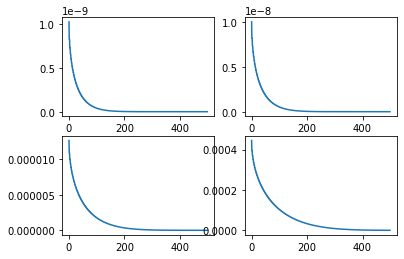

In [58]:
# 

fig, axs = plt.subplots(2, 2)
n=1000
hamm_distances = space_frac_to_hamm_dist(n, space_frac_rang)
r = 1
for ind, hamm_dist in enumerate(hamm_distances):
    circle_center_distances = np.arange(0,n//2,1).astype(int)
    res = expected_intersection_lune(n, circle_center_distances, hamm_dist, r)
    
    xind = ind//2
    yind = ind%2
    
    axs[xind, yind].plot(circle_center_distances, res,label="$d$="+str(hamm_dist))
    #axs[xind, yind].set_title()
    
for ax in axs.flat:
    ax.set(xlabel='$d_v$ between two vectors', 
           ylabel='Log $p$ in the Intersection')
    
for ax in axs.flat:
    #ax.label_outer()
    ax.legend()
    ax.set_yscale('log')
fig.tight_layout()
plt.gcf().savefig('figures/CircleInterActualVals_LogScale.png', dpi=250)
plt.show()

    